In [1]:
import importlib
import numpy as np
import os
import pandas as pd

In [2]:
seed = 0
np.random.seed(seed)

norway_df = pd.read_csv('gse84207_gene_methylation.csv')

norway_df = norway_df.rename(columns={'Unnamed: 0': 'GeneSymbol'})
norway_df = norway_df.set_index('GeneSymbol')

print("CNV Matrix After Transpose and Header Fix:", norway_df.shape)
print("\nDataFrame preview:")
norway_df = norway_df.T
norway_df.head()

CNV Matrix After Transpose and Header Fix: (20789, 330)

DataFrame preview:


GeneSymbol,RBL2,SFRP1,NIPA2,DDX55,MAEL,LILRA6,LOC283050,ZMIZ1,DNAJA2,C8orf31,...,UGT2B11,TRIM77,SAMD9L,ABCA8,USP17,OR52L1,SYT4,USH2A,FAM75A7,FAM75A5
GSM2229021,0.140216,0.513900,0.070366,0.066723,0.869953,0.460164,0.081064,0.075971,0.062172,0.385290,...,0.255605,0.560637,0.871121,0.244565,0.577935,0.444277,0.717905,0.749380,0.791368,0.791368
GSM2229022,0.183761,0.266260,0.069628,0.049381,0.837331,0.435425,0.108591,0.092987,0.073833,0.245906,...,0.280451,0.547933,0.870872,0.345952,0.498565,0.743370,0.624140,0.359544,0.892487,0.892487
GSM2229023,0.191972,0.230631,0.067658,0.053021,0.838371,0.505102,0.100636,0.096055,0.074348,0.296882,...,0.352487,0.590590,0.893573,0.444644,0.285479,0.526973,0.667498,0.375565,0.829360,0.829360
GSM2229024,0.088870,0.467043,0.079242,0.070944,0.769093,0.357798,0.086917,0.081322,0.080003,0.201240,...,0.248784,0.794088,0.851600,0.367400,0.504041,0.415774,0.846289,0.595240,0.695630,0.695630
GSM2229025,0.265772,0.190382,0.070186,0.046093,0.857263,0.477567,0.099273,0.086385,0.069649,0.374314,...,0.505138,0.860709,0.875188,0.724306,0.667174,0.595727,0.685045,0.583488,0.815140,0.815140


In [3]:
norway_clinical = pd.read_csv("GSE84207_metadata_clean.csv", index_col=0)
norway_clinical.index = norway_clinical.index.str.replace('"', '', regex=False)
norway_clinical = norway_clinical.drop(columns=["Gender"])
norway_clinical = norway_clinical.drop(columns=["Characteristic_2"])
norway_clinical = norway_clinical.drop(columns=["Cohort"])
norway_clinical['PAM50'] = norway_clinical['PAM50'].str.rstrip('"')

In [4]:
norway_clinical.head()

,PAM50
GSM2229021,LumA
GSM2229022,LumB
GSM2229023,LumA
GSM2229024,Normal
GSM2229025,NA


In [5]:
print(norway_clinical['PAM50'].unique().tolist())

['LumA', 'LumB', 'Normal', 'NA', 'Her2', 'Basal']


In [6]:
norway_df = pd.concat([norway_df, norway_clinical], axis=1)
norway_df.head()

,RBL2,SFRP1,NIPA2,DDX55,MAEL,LILRA6,LOC283050,ZMIZ1,DNAJA2,C8orf31,...,TRIM77,SAMD9L,ABCA8,USP17,OR52L1,SYT4,USH2A,FAM75A7,FAM75A5,PAM50
GSM2229021,0.140216,0.513900,0.070366,0.066723,0.869953,0.460164,0.081064,0.075971,0.062172,0.385290,...,0.560637,0.871121,0.244565,0.577935,0.444277,0.717905,0.749380,0.791368,0.791368,LumA
GSM2229022,0.183761,0.266260,0.069628,0.049381,0.837331,0.435425,0.108591,0.092987,0.073833,0.245906,...,0.547933,0.870872,0.345952,0.498565,0.743370,0.624140,0.359544,0.892487,0.892487,LumB
GSM2229023,0.191972,0.230631,0.067658,0.053021,0.838371,0.505102,0.100636,0.096055,0.074348,0.296882,...,0.590590,0.893573,0.444644,0.285479,0.526973,0.667498,0.375565,0.829360,0.829360,LumA
GSM2229024,0.088870,0.467043,0.079242,0.070944,0.769093,0.357798,0.086917,0.081322,0.080003,0.201240,...,0.794088,0.851600,0.367400,0.504041,0.415774,0.846289,0.595240,0.695630,0.695630,Normal
GSM2229025,0.265772,0.190382,0.070186,0.046093,0.857263,0.477567,0.099273,0.086385,0.069649,0.374314,...,0.860709,0.875188,0.724306,0.667174,0.595727,0.685045,0.583488,0.815140,0.815140,NA


In [7]:
norway_df = norway_df[norway_df['PAM50'] != 'NA']
norway_df.head()

,RBL2,SFRP1,NIPA2,DDX55,MAEL,LILRA6,LOC283050,ZMIZ1,DNAJA2,C8orf31,...,TRIM77,SAMD9L,ABCA8,USP17,OR52L1,SYT4,USH2A,FAM75A7,FAM75A5,PAM50
GSM2229021,0.140216,0.513900,0.070366,0.066723,0.869953,0.460164,0.081064,0.075971,0.062172,0.385290,...,0.560637,0.871121,0.244565,0.577935,0.444277,0.717905,0.749380,0.791368,0.791368,LumA
GSM2229022,0.183761,0.266260,0.069628,0.049381,0.837331,0.435425,0.108591,0.092987,0.073833,0.245906,...,0.547933,0.870872,0.345952,0.498565,0.743370,0.624140,0.359544,0.892487,0.892487,LumB
GSM2229023,0.191972,0.230631,0.067658,0.053021,0.838371,0.505102,0.100636,0.096055,0.074348,0.296882,...,0.590590,0.893573,0.444644,0.285479,0.526973,0.667498,0.375565,0.829360,0.829360,LumA
GSM2229024,0.088870,0.467043,0.079242,0.070944,0.769093,0.357798,0.086917,0.081322,0.080003,0.201240,...,0.794088,0.851600,0.367400,0.504041,0.415774,0.846289,0.595240,0.695630,0.695630,Normal
GSM2229026,0.143114,0.391688,0.074742,0.059427,0.838503,0.413969,0.092659,0.085884,0.074192,0.370799,...,0.615185,0.848410,0.300107,0.628677,0.674867,0.795920,0.731027,0.870370,0.870370,LumB


In [8]:
tcga_df = pd.read_csv('gene_level_methylation.csv')

print("Original columns:", tcga_df.columns.tolist()[:10], "...")

# Remove the "SingleValueType" column if it exists
if "SingleValueType" in tcga_df.columns:
    tcga_df = tcga_df.drop(columns=["SingleValueType"])
    print("Column 'SingleValueType' has been removed successfully.")
else:
    print("Column 'SingleValueType' does not exist in the DataFrame.")

# Sort columns and transpose
tcga_df = tcga_df.reindex(sorted(tcga_df.columns), axis=1)
tcga_df = tcga_df.T

# Set first row (originally "GeneSymbol") as new column names
tcga_df.columns = tcga_df.iloc[0]  # first row becomes column headers
tcga_df = tcga_df.drop(tcga_df.index[0])  # drop the first row

print("CNV Matrix After Transpose and Header Fix:", tcga_df.shape)
print("\nDataFrame preview:")
tcga_df.head()

Original columns: ['GeneSymbol', 'SingleValueType', 'TCGA-OL-A66H-01', 'TCGA-3C-AALK-01', 'TCGA-AC-A5EH-01', 'TCGA-EW-A2FW-01', 'TCGA-E9-A1R0-01', 'TCGA-AR-A1AJ-01', 'TCGA-AC-A62Y-01', 'TCGA-E9-A1QZ-01'] ...
Column 'SingleValueType' has been removed successfully.
CNV Matrix After Transpose and Header Fix: (888, 19277)

DataFrame preview:


GeneSymbol,RPS4Y2,RPS4Y1,TBL1Y,NLGN4Y,PRKY,PCDH11Y,TTTY20,GABRE,FTHL17,PORCN,...,EP300,DERL3,PLA2G3,TMPRSS6,MIR1281,GGT3P,UBE2L3,APOL5,SLC5A1,CDC42EP1
TCGA-3C-AAAU-01,0.527,0.57214,0.447925,0.052075,0.1233,0.0581,0.50125,0.377325,0.878033,0.365011,...,0.099,0.04835,0.7942,0.86505,0.099,0.8638,0.3368,0.928,0.1865,0.0178
TCGA-3C-AALI-01,0.6489,0.5074,0.426008,0.07245,0.8148,0.0836,0.473473,0.387325,0.758033,0.254889,...,0.0617,0.38345,0.7698,0.8228,0.0617,0.8317,0.8098,0.8742,0.8993,0.0234
TCGA-3C-AALJ-01,0.6949,0.563733,0.464233,0.0675,0.7933,0.0627,0.45565,0.333725,0.6283,0.473433,...,0.075,0.4813,0.7681,0.8433,0.075,0.7911,0.44875,0.8888,0.739,0.031
TCGA-3C-AALK-01,0.5778,0.5722,0.50945,0.34105,0.6853,0.2694,0.5769,0.53885,0.9241,0.417256,...,0.0856,0.5369,0.7532,0.83555,0.0856,0.8151,0.3113,0.9321,0.763,0.0274
TCGA-4H-AAAK-01,0.4716,0.5077,0.45365,0.063675,0.6571,0.3482,0.438033,0.480625,0.9169,0.469724,...,0.0808,0.1768,0.6704,0.7699,0.0808,0.8049,0.2855,0.937,0.7207,0.0268


In [9]:
tcga_clinical = pd.read_csv('BRCA_clinicalMatrix.gz',compression='gzip',sep='\t',index_col=0)
print("Clinical Data Before:", tcga_clinical.shape)
k = tcga_clinical.columns.get_loc('PAM50Call_RNAseq')
tcga_clinical = tcga_clinical[tcga_clinical.iloc[:,k].isna()==False]
# print(tcga_clinical.columns.tolist())
tcga_clinical.head()

Clinical Data Before: (1247, 202)


,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,Integrated_Clusters_no_exp__nature2012,...,_GENOMIC_ID_TCGA_BRCA_mutation_wustl_gene,_GENOMIC_ID_TCGA_BRCA_miRNA_GA,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_GA_gene,_GENOMIC_ID_TCGA_BRCA_gistic2thd,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_BRCA_G4502A_07_3,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_BRCA_gistic2,_GENOMIC_ID_TCGA_BRCA_PDMarray
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB-01,Stage I,70.0,1.0,Stage I,259.0,NaN,Positive,FEMALE,Negative,NaN,...,TCGA-A1-A0SB-01A-11D-A142-09,NaN,a2405d64-34eb-4915-abf7-8530151d5cb0,NaN,TCGA-A1-A0SB-01A-11D-A141-01,TCGA-A1-A0SB-01,NaN,a2405d64-34eb-4915-abf7-8530151d5cb0,TCGA-A1-A0SB-01A-11D-A141-01,NaN
TCGA-A1-A0SD-01,Stage IIA,59.0,2.0,Stage IIA,437.0,NaN,Positive,FEMALE,Negative,NaN,...,TCGA-A1-A0SD-01A-11D-A10Y-09,NaN,15bad71d-3031-413b-9e8d-6426ae5dfbea,NaN,TCGA-A1-A0SD-01A-11D-A111-01,TCGA-A1-A0SD-01,TCGA-A1-A0SD-01A-11R-A115-07,15bad71d-3031-413b-9e8d-6426ae5dfbea,TCGA-A1-A0SD-01A-11D-A111-01,TCGA-A1-A0SD-01
TCGA-A1-A0SE-01,Stage I,56.0,2.0,Stage I,1320.0,NaN,Positive,FEMALE,Negative,NaN,...,TCGA-A1-A0SE-01A-11D-A099-09,TCGA-A1-A0SE-01,a998e0ce-9248-460f-aabc-2dad452a1ff9,TCGA-A1-A0SE-01,TCGA-A1-A0SE-01A-11D-A087-01,NaN,TCGA-A1-A0SE-01A-11R-A084-07,a998e0ce-9248-460f-aabc-2dad452a1ff9,TCGA-A1-A0SE-01A-11D-A087-01,TCGA-A1-A0SE-01
TCGA-A1-A0SF-01,Stage IIA,54.0,3.0,Stage IIA,1463.0,NaN,Positive,FEMALE,Negative,NaN,...,TCGA-A1-A0SF-01A-11D-A142-09,NaN,28089e15-5e2c-4e83-ba6c-62b3cb40e431,NaN,TCGA-A1-A0SF-01A-11D-A141-01,TCGA-A1-A0SF-01,NaN,28089e15-5e2c-4e83-ba6c-62b3cb40e431,TCGA-A1-A0SF-01A-11D-A141-01,NaN
TCGA-A1-A0SG-01,Stage IIB,61.0,4.0,Stage IIB,433.0,NaN,Positive,FEMALE,Negative,NaN,...,TCGA-A1-A0SG-01A-11D-A142-09,NaN,0df6b948-367d-4951-9d98-d3bebabff63e,NaN,TCGA-A1-A0SG-01A-11D-A141-01,TCGA-A1-A0SG-01,NaN,0df6b948-367d-4951-9d98-d3bebabff63e,TCGA-A1-A0SG-01A-11D-A141-01,NaN


In [10]:
pam50_mask = tcga_clinical.columns.str.contains('PAM50')
print("Columns containing 'PAM50':", tcga_clinical.columns[pam50_mask].tolist())
print(tcga_clinical['PAM50Call_RNAseq'].unique().tolist())

Columns containing 'PAM50': ['Integrated_Clusters_with_PAM50__nature2012', 'PAM50Call_RNAseq', 'PAM50_mRNA_nature2012']
['Normal', 'LumA', 'LumB', 'Basal', 'Her2']


In [11]:
tcga_clinical = tcga_clinical[['PAM50Call_RNAseq']]
tcga_clinical.index = pd.Series({x: x.replace('-', '-') for x in tcga_clinical.index})
tcga_clinical = tcga_clinical.rename(columns={'PAM50Call_RNAseq': 'PAM50'})
tcga_clinical.head()

,PAM50
TCGA-A1-A0SB-01,Normal
TCGA-A1-A0SD-01,LumA
TCGA-A1-A0SE-01,LumA
TCGA-A1-A0SF-01,LumA
TCGA-A1-A0SG-01,LumA


In [12]:
tcga_df = pd.concat([tcga_df, tcga_clinical], axis=1)
tcga_df = tcga_df[tcga_df['PAM50'].notna()]
tcga_df.head()

,RPS4Y2,RPS4Y1,TBL1Y,NLGN4Y,PRKY,PCDH11Y,TTTY20,GABRE,FTHL17,PORCN,...,DERL3,PLA2G3,TMPRSS6,MIR1281,GGT3P,UBE2L3,APOL5,SLC5A1,CDC42EP1,PAM50
TCGA-A1-A0SB-01,0.5209,0.5105,0.4332,0.037325,0.4363,0.0295,0.4262,0.7125,0.944867,0.357322,...,0.32415,0.6185,0.70185,0.0855,0.8338,0.1482,0.9249,0.0395,0.024,Normal
TCGA-A1-A0SE-01,0.4888,0.5696,0.3907,0.139125,0.6605,0.0613,0.439,0.514275,0.836533,0.442667,...,0.53555,0.7099,0.7836,0.0687,0.858,0.3704,0.9177,0.2489,0.02,LumA
TCGA-A1-A0SF-01,0.5391,0.5437,0.454925,0.192025,0.5849,0.12625,0.3864,0.481275,0.9428,0.387322,...,0.13925,0.481,0.69015,0.0601,0.8438,0.2285,0.8858,0.2295,0.0201,LumA
TCGA-A1-A0SG-01,0.4876,0.5256,0.39722,0.0611,0.6684,0.0664,0.514,0.557475,0.939767,0.308956,...,0.0921,0.8306,0.771,0.0783,0.8193,0.2955,0.8971,0.1358,0.0219,LumA
TCGA-A1-A0SH-01,0.5115,0.5117,0.2889,0.09815,0.5875,0.20505,0.4143,0.49695,0.9238,0.436256,...,0.4153,0.5981,0.7798,0.0921,0.8205,0.3805,0.8396,0.4089,0.0231,LumA


In [13]:
# filter probes with >20% missing values
threshold = 0.2
tcga_df = tcga_df[tcga_df.isnull().mean(axis=1) < threshold]

# filter samples with >10% missing values
threshold = 0.1
tcga_df = tcga_df.loc[:, tcga_df.isnull().mean(axis=0) <= threshold]

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

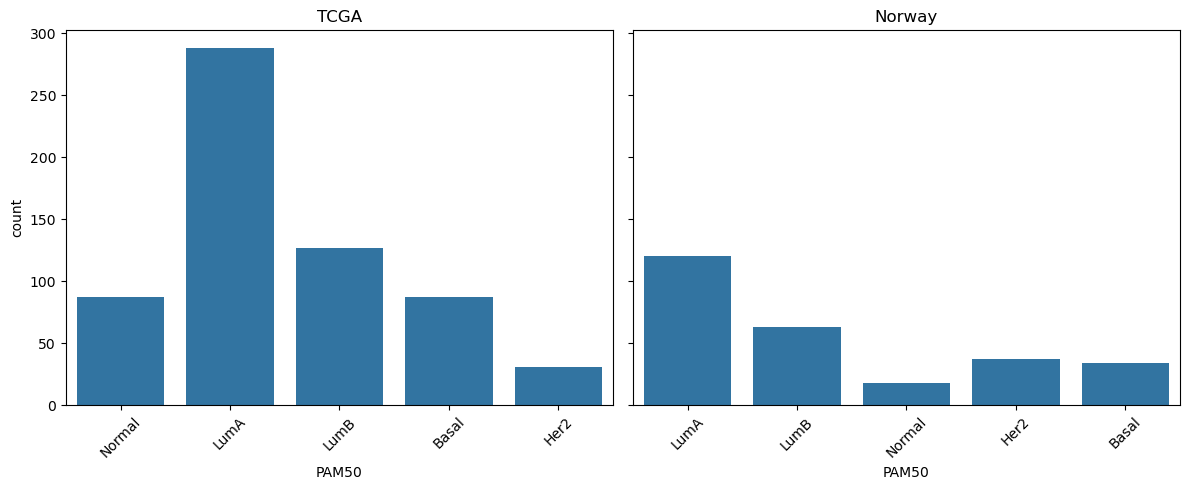

In [15]:
tcga_order = tcga_df['PAM50'].unique().tolist()
norway_order = norway_df['PAM50'].unique().tolist()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# TCGA PAM50 counts
sns.countplot(x=tcga_df['PAM50'], order=tcga_order, ax=axes[0])
axes[0].set_title("TCGA")
axes[0].tick_params(axis="x", rotation=45)

# Norway PAM50 counts
sns.countplot(x=norway_df['PAM50'], order=norway_order, ax=axes[1])
axes[1].set_title("Norway")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [16]:
def class_balance(y):
    counts = y.value_counts()
    ratios = (counts / counts.sum()).round(3)
    return pd.DataFrame({"count": counts, "ratio": ratios})

tcga_balance = class_balance(tcga_df['PAM50'])
norway_balance = class_balance(norway_df['PAM50'])

print("TCGA class balance:\n", tcga_balance)
print("\nNorway class balance:\n", norway_balance)

TCGA class balance:
         count  ratio
PAM50               
LumA      288  0.465
LumB      127  0.205
Normal     87  0.140
Basal      87  0.140
Her2       31  0.050

Norway class balance:
         count  ratio
PAM50               
LumA      120  0.441
LumB       63  0.232
Her2       37  0.136
Basal      34  0.125
Normal     18  0.066


mean    0.324939
std     0.297034
min     0.006300
max     0.993267
p1      0.017375
p5      0.026300
p25     0.056667
p50     0.215685
p75     0.556518
p95     0.892734
p99     0.943000
Name: TCGA, dtype: float64

mean    0.331693
std     0.279380
min     0.023580
max     0.974258
p1      0.050286
p5      0.059211
p25     0.082274
p50     0.201406
p75     0.581398
p95     0.834989
p99     0.887006
Name: Norway, dtype: float64

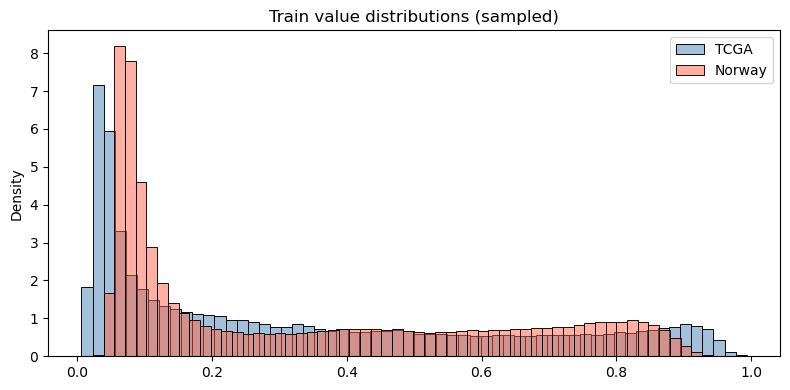

In [17]:
def sample_values(tcga_df, n=200_000, seed=0):
    rng = np.random.default_rng(seed)
    flat = tcga_df.to_numpy().ravel()
    if flat.size <= n:
        return flat
    idx = rng.integers(0, flat.size, size=n)
    return flat[idx]

def value_summary(values):
    q = np.percentile(values, [1, 5, 25, 50, 75, 95, 99])
    return pd.Series({
        "mean": values.mean(),
        "std": values.std(ddof=0),
        "min": values.min(),
        "max": values.max(),
        "p1": q[0], "p5": q[1], "p25": q[2], "p50": q[3],
        "p75": q[4], "p95": q[5], "p99": q[6],
    })

tcga_feature_cols = [c for c in tcga_df.columns if c != 'PAM50']
vals_tcga = sample_values(tcga_df[tcga_feature_cols])

norway_feature_cols = [c for c in norway_df.columns if c != 'PAM50']
vals_nor = sample_values(norway_df[norway_feature_cols])

tcga_summary = value_summary(vals_tcga)
tcga_summary.name = "TCGA"

nor_summary = value_summary(vals_nor)
nor_summary.name = "Norway"

display(tcga_summary, nor_summary)

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(vals_tcga, bins=60, color="steelblue", alpha=0.5, stat="density", ax=ax, label="TCGA")
sns.histplot(vals_nor, bins=60, color="tomato", alpha=0.5, stat="density", ax=ax, label="Norway")
ax.set_title("Train value distributions (sampled)")
ax.legend()
plt.tight_layout()

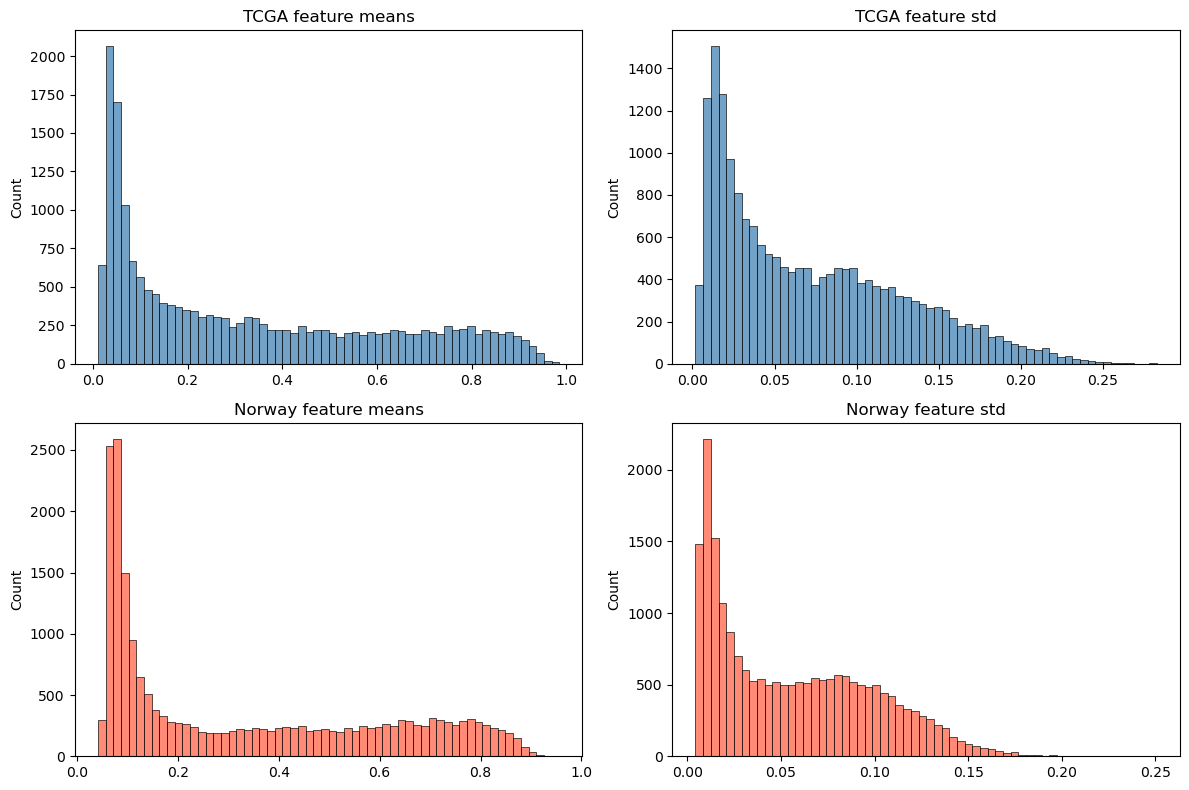

In [18]:
def feature_stats(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0, ddof=0)
    return mean, std

tcga_features = tcga_df.drop(columns=['PAM50'])
norway_features = norway_df.drop(columns=['PAM50'])

mean_tcga, std_tcga = feature_stats(tcga_features)
mean_nor, std_nor = feature_stats(norway_features)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(mean_tcga, bins=60, color="steelblue", ax=axes[0, 0])
axes[0, 0].set_title("TCGA feature means")
sns.histplot(std_tcga, bins=60, color="steelblue", ax=axes[0, 1])
axes[0, 1].set_title("TCGA feature std")

sns.histplot(mean_nor, bins=60, color="tomato", ax=axes[1, 0])
axes[1, 0].set_title("Norway feature means")
sns.histplot(std_nor, bins=60, color="tomato", ax=axes[1, 1])
axes[1, 1].set_title("Norway feature std")

plt.tight_layout()

median         8.834747
p75           22.791229
p90           44.933115
p95           62.866456
frac_gt_10     0.469627
dtype: float64

median         3.487692
p75            6.486088
p90           11.741908
p95           16.634001
frac_gt_10     0.132763
dtype: float64

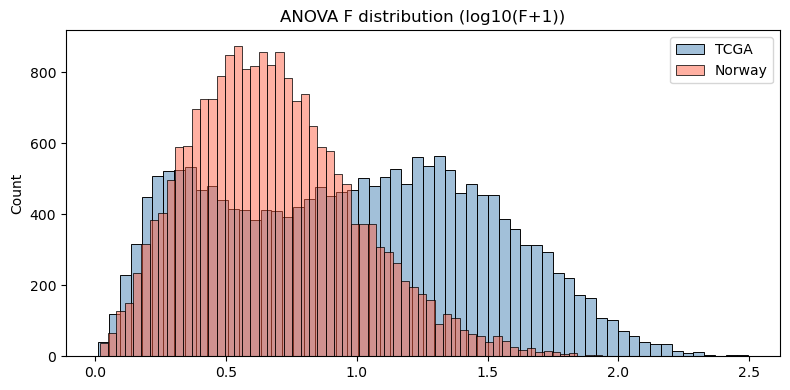

In [19]:
# ANOVA fallback in case sklearn is not available
def anova_fallback(X, y):
    Xv = X.to_numpy()
    yv = pd.Categorical(y).codes
    classes = np.unique(yv)
    overall = Xv.mean(axis=0)
    ssb = np.zeros(Xv.shape[1], dtype=np.float64)
    ssw = np.zeros(Xv.shape[1], dtype=np.float64)

    for c in classes:
        Xc = Xv[yv == c]
        n = Xc.shape[0]
        if n == 0:
            continue
        mean_c = Xc.mean(axis=0)
        var_c = Xc.var(axis=0, ddof=0)
        ssb += n * (mean_c - overall) ** 2
        ssw += n * var_c

    dfb = len(classes) - 1
    dfw = Xv.shape[0] - len(classes)
    f = (ssb / dfb) / (ssw / dfw)
    f[~np.isfinite(f)] = np.nan
    return f

# Try sklearn's f_classif if available
try:
    from sklearn.feature_selection import f_classif
    def anova_f(X, y):
        f, _ = f_classif(X, y)
        return f
except Exception:
    anova_f = anova_fallback

# Summary function
def f_summary(f):
    f = f[np.isfinite(f)]
    return pd.Series({
        "median": np.median(f),
        "p75": np.percentile(f, 75),
        "p90": np.percentile(f, 90),
        "p95": np.percentile(f, 95),
        "frac_gt_10": (f > 10).mean(),
    })

# Features = all columns except 'PAM50'
X_tcga = tcga_df.drop(columns=['PAM50'])
y_tcga = tcga_df['PAM50']

X_nor = norway_df.drop(columns=['PAM50'])
y_nor = norway_df['PAM50']

# Compute ANOVA F scores
f_tcga = anova_f(X_tcga, y_tcga)
f_nor = anova_f(X_nor, y_nor)

# Display summaries
display(f_summary(f_tcga), f_summary(f_nor))

# Plot distributions
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(np.log10(f_tcga + 1), bins=60, color="steelblue", alpha=0.5, ax=ax, label="TCGA")
sns.histplot(np.log10(f_nor + 1), bins=60, color="tomato", alpha=0.5, ax=ax, label="Norway")
ax.set_title("ANOVA F distribution (log10(F+1))")
ax.legend()
plt.tight_layout()
plt.show()

Mean diff quantiles:
0.50    0.045374
0.90    0.163712
0.99    0.406208
dtype: object

Std ratio quantiles (TCGA / Norway):
0.1    0.696140
0.5    1.346131
0.9    2.479306
dtype: float64


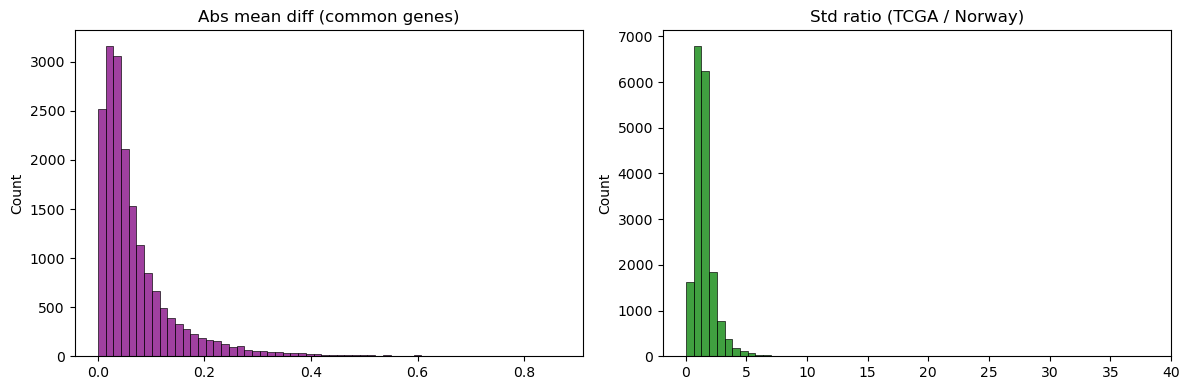

In [20]:
tcga_X = tcga_df.drop(columns=['PAM50'])
norway_X = norway_df.drop(columns=['PAM50'])

common = tcga_X.columns.intersection(norway_X.columns)
tcga_c = tcga_X[common]
nor_c = norway_X[common]

mean_diff = (tcga_c.mean() - nor_c.mean()).abs()

std_ratio = tcga_c.std(ddof=0) / nor_c.std(ddof=0)

std_ratio = std_ratio.astype(float).replace([np.inf, -np.inf], np.nan).dropna()

print("Mean diff quantiles:")
print(mean_diff.quantile([0.5, 0.9, 0.99]))
print("\nStd ratio quantiles (TCGA / Norway):")
print(std_ratio.quantile([0.1, 0.5, 0.9]))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(mean_diff, bins=60, color="purple", ax=axes[0])
axes[0].set_title("Abs mean diff (common genes)")

sns.histplot(std_ratio, bins=60, color="green", ax=axes[1])
axes[1].set_title("Std ratio (TCGA / Norway)")

plt.tight_layout()
plt.show()